In [ ]:
#instal pip install efficient-apriori
!pip install efficient-apriori

In [ ]:
#Import library
import pandas as pd # for data manipulation
import matplotlib.pyplot as plt # for ploting frequency distribution chart
from efficient_apriori import apriori # for association analysis
import sys
import os

#Assign main directory to a variable
main_dir=os.path.dirname(sys.path[0])

In [ ]:
#Import dataset
#Masukan data Market Basket Optimisation.csv yang telah diunduh.
# Ingest the data
df = pd.read_csv(main_dir + '/content/Market_Basket_Optimisation.csv',
                 encoding="utf-8", header=None)

#tampilkan data frame
df

FileNotFoundError: [Errno 2] No such file or directory: '//content/Market_Basket_Optimisation.csv'

### Exploration

In [ ]:
# Put all transactions into a single list
txns = df.values.reshape(-1).tolist()

# Create a dataframe using this single list and add a column for count
df_list = pd.DataFrame(txns)
df_list['Count'] = 1

# Group by items and rename columns
df_list = df_list.groupby(by=[0], as_index=False).count().sort_values(by=['Count'], ascending=True)
df_list['Percentage'] = (df_list['Count'] / df_list['Count'].sum()) * 100  # Calculate percentage
df_list= df_list.rename(columns={0: 'Item'})

#Tampilkan dtaframe
df_list

In [ ]:
# Draw a horizontal bar chart
plt.figure(figsize=(16,20), dpi=300)
plt.ylabel('Item Name')
plt.xlabel('Count')
plt.barh(df_list['Item'], width=df_list['Count'], color='black', height=0.8)
plt.margins (0.01)
plt.show()

### Algotirma Apriori


In [ ]:
# Create a list of lists from a dataframe
txns2=df.stack().groupby(level=0).apply(list).tolist()

# Show what it looks like
txns2

In [ ]:
#for item in sorted (rules, key-lambda item: (item.lift,item.conviction), reverse=True):
#print(item)

## Latihan

In [ ]:
#Import library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
from mlxtend.preprocessing import TransactionEncoder
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#Import dataste
data = pd.read_csv('/content/GroceryStoreDataSet.csv')
data.columns=["Product"]
data

print("Number Of Rows is", data.shape[0])
print("Number Of Columns is", data.shape[1])

Number Of Rows is 19
Number Of Columns is 1


In [ ]:
#Data preparation
data =list(data["Product"].apply(lambda x:x.split(",")))
data

[['BREAD', 'MILK', 'BISCUIT', 'CORNFLAKES'],
 ['BREAD', 'TEA', 'BOURNVITA'],
 ['JAM', 'MAGGI', 'BREAD', 'MILK'],
 ['MAGGI', 'TEA', 'BISCUIT'],
 ['BREAD', 'TEA', 'BOURNVITA'],
 ['MAGGI', 'TEA', 'CORNFLAKES'],
 ['MAGGI', 'BREAD', 'TEA', 'BISCUIT'],
 ['JAM', 'MAGGI', 'BREAD', 'TEA'],
 ['BREAD', 'MILK'],
 ['COFFEE', 'COCK', 'BISCUIT', 'CORNFLAKES'],
 ['COFFEE', 'COCK', 'BISCUIT', 'CORNFLAKES'],
 ['COFFEE', 'SUGER', 'BOURNVITA'],
 ['BREAD', 'COFFEE', 'COCK'],
 ['BREAD', 'SUGER', 'BISCUIT'],
 ['COFFEE', 'SUGER', 'CORNFLAKES'],
 ['BREAD', 'SUGER', 'BOURNVITA'],
 ['BREAD', 'COFFEE', 'SUGER'],
 ['BREAD', 'COFFEE', 'SUGER'],
 ['TEA', 'MILK', 'COFFEE', 'CORNFLAKES']]

In [ ]:
#TransactionEncoder
te = TransactionEncoder()
te_data =te.fit_transform(data)
df =pd.DataFrame (te_data, columns= te.columns_)
df

,BISCUIT,BOURNVITA,BREAD,COCK,COFFEE,CORNFLAKES,JAM,MAGGI,MILK,SUGER,TEA
0,True,False,True,False,False,True,False,False,True,False,False
1,False,True,True,False,False,False,False,False,False,False,True
2,False,False,True,False,False,False,True,True,True,False,False
3,True,False,False,False,False,False,False,True,False,False,True
4,False,True,True,False,False,False,False,False,False,False,True
5,False,False,False,False,False,True,False,True,False,False,True
6,True,False,True,False,False,False,False,True,False,False,True
7,False,False,True,False,False,False,True,True,False,False,True
8,False,False,True,False,False,False,False,False,True,False,False
9,True,False,False,True,True,True,False,False,False,False,False


In [ ]:
df_zero =df.replace(True,1)
df_zero

,BISCUIT,BOURNVITA,BREAD,COCK,COFFEE,CORNFLAKES,JAM,MAGGI,MILK,SUGER,TEA
0,1,False,1,False,False,1,False,False,1,False,False
1,False,1,1,False,False,False,False,False,False,False,1
2,False,False,1,False,False,False,1,1,1,False,False
3,1,False,False,False,False,False,False,1,False,False,1
4,False,1,1,False,False,False,False,False,False,False,1
5,False,False,False,False,False,1,False,1,False,False,1
6,1,False,1,False,False,False,False,1,False,False,1
7,False,False,1,False,False,False,1,1,False,False,1
8,False,False,1,False,False,False,False,False,1,False,False
9,1,False,False,1,1,1,False,False,False,False,False


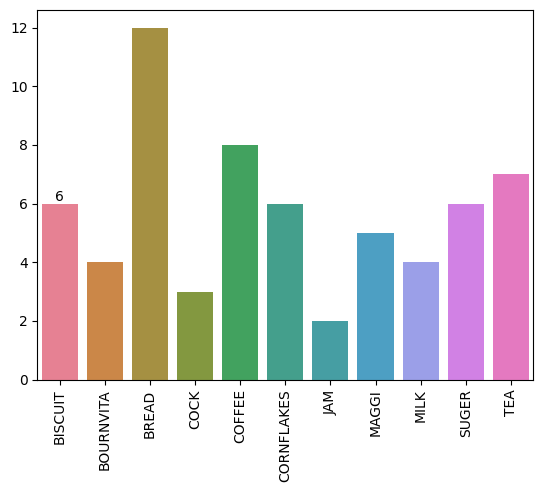

In [ ]:
#visualisasi
ax = sns.barplot(df_zero, estimator="sum", errorbar=None)
ax.bar_label(ax.containers [0], fontsize=10)
plt.xticks (rotation =90)
plt.show()

In [ ]:
#support
first = pd.DataFrame(df.sum() / df.shape[0],
                     columns = ["Support"]).sort_values("Support", ascending = False)
first

,Support
BREAD,0.631579
COFFEE,0.421053
TEA,0.368421
BISCUIT,0.315789
CORNFLAKES,0.315789
SUGER,0.315789
MAGGI,0.263158
BOURNVITA,0.210526
MILK,0.210526
COCK,0.157895


In [ ]:
#untuk pembelian di ats 15%
first [first ['Support'] >= 0.15]

,Support
BREAD,0.631579
COFFEE,0.421053
TEA,0.368421
BISCUIT,0.315789
CORNFLAKES,0.315789
SUGER,0.315789
MAGGI,0.263158
BOURNVITA,0.210526
MILK,0.210526
COCK,0.157895


In [ ]:
#Second Iteration
second = list(itertools.combinations (first.index, 2))
second = [list(i) for i in second]

# Sample of combinations
second

[['BREAD', 'COFFEE'],
 ['BREAD', 'TEA'],
 ['BREAD', 'BISCUIT'],
 ['BREAD', 'CORNFLAKES'],
 ['BREAD', 'SUGER'],
 ['BREAD', 'MAGGI'],
 ['BREAD', 'BOURNVITA'],
 ['BREAD', 'MILK'],
 ['BREAD', 'COCK'],
 ['BREAD', 'JAM'],
 ['COFFEE', 'TEA'],
 ['COFFEE', 'BISCUIT'],
 ['COFFEE', 'CORNFLAKES'],
 ['COFFEE', 'SUGER'],
 ['COFFEE', 'MAGGI'],
 ['COFFEE', 'BOURNVITA'],
 ['COFFEE', 'MILK'],
 ['COFFEE', 'COCK'],
 ['COFFEE', 'JAM'],
 ['TEA', 'BISCUIT'],
 ['TEA', 'CORNFLAKES'],
 ['TEA', 'SUGER'],
 ['TEA', 'MAGGI'],
 ['TEA', 'BOURNVITA'],
 ['TEA', 'MILK'],
 ['TEA', 'COCK'],
 ['TEA', 'JAM'],
 ['BISCUIT', 'CORNFLAKES'],
 ['BISCUIT', 'SUGER'],
 ['BISCUIT', 'MAGGI'],
 ['BISCUIT', 'BOURNVITA'],
 ['BISCUIT', 'MILK'],
 ['BISCUIT', 'COCK'],
 ['BISCUIT', 'JAM'],
 ['CORNFLAKES', 'SUGER'],
 ['CORNFLAKES', 'MAGGI'],
 ['CORNFLAKES', 'BOURNVITA'],
 ['CORNFLAKES', 'MILK'],
 ['CORNFLAKES', 'COCK'],
 ['CORNFLAKES', 'JAM'],
 ['SUGER', 'MAGGI'],
 ['SUGER', 'BOURNVITA'],
 ['SUGER', 'MILK'],
 ['SUGER', 'COCK'],
 ['SUGER', 'JA

In [ ]:
#Mencari nilai value dan mengeliminasi dari nilai support
value = []
for i in range(0, len(second)):
  temp = df.T.loc[second[i]].sum()
  temp = len(temp[temp == df.T.loc[second[i]].shape[0]]) / df.shape[0]
  value.append(temp)

# Create a data frame
secondIteration = pd.DataFrame (value, columns = ["Support"])
secondIteration ["index"] = [tuple (i) for i in second]
secondIteration ['length'] = secondIteration ['index'].apply(lambda x:len(x))
secondIteration = secondIteration.set_index("index").sort_values("Support", ascending=False)

#Elimination by Support Value
secondIteration

,Support,length
index,,
"(COFFEE, CORNFLAKES)",0.210526,2
"(BREAD, TEA)",0.210526,2
"(TEA, MAGGI)",0.210526,2
"(BREAD, SUGER)",0.210526,2
"(COFFEE, SUGER)",0.210526,2
"(BREAD, COFFEE)",0.157895,2
"(COFFEE, COCK)",0.157895,2
"(BISCUIT, CORNFLAKES)",0.157895,2
"(BREAD, BISCUIT)",0.157895,2


In [ ]:
df_second=pd.DataFrame()
df_second.insert(0, "Name Product", tuple (second))
df_second.insert(1, "Support", [0.20,0.20,0.20,0.20,0.20,0.20,0.20,
                                0.15,0.15,0.15,0.15,0.15,
                                0.10,0.10,0.10,0.10,0.10,0.10,0.10,0.10,0.10,0.10,0.10,0.10,
                                0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,
                                0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00,
                                0.00, 0.00, 0.00, 0.00, 0.00, 0.00])
df_second

,Name Product,Support
0,"[BREAD, COFFEE]",0.20
1,"[BREAD, TEA]",0.20
2,"[BREAD, BISCUIT]",0.20
3,"[BREAD, CORNFLAKES]",0.20
4,"[BREAD, SUGER]",0.20
5,"[BREAD, MAGGI]",0.20
6,"[BREAD, BOURNVITA]",0.20
7,"[BREAD, MILK]",0.15
8,"[BREAD, COCK]",0.15
9,"[BREAD, JAM]",0.15


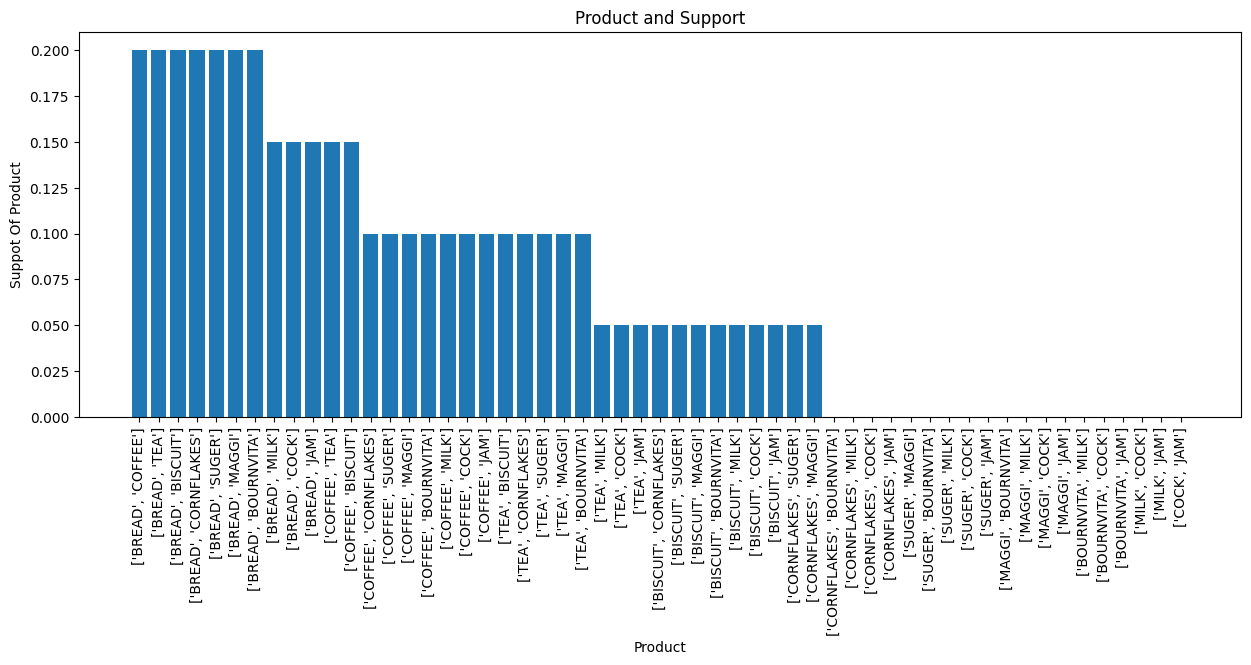

In [ ]:
plt.figure(figsize = (15,5))
x = range(55)
y =df_second ["Support"]
labels = [second]

plt.bar(x,y)
plt.xticks (x, labels[0], rotation =90)
plt.title("Product and Support")
plt.xlabel("Product")
plt.ylabel("Suppot Of Product")
plt.show()

In [ ]:
#Iterasi pertama
def ar_iterations(data, num_iter = 1, support_value = 0.1, iterationIndex = None):

  #Iterasi selanjutnya
  def ar_calculation(iterationIndex = iterationIndex):
    value = [] # Calculation of support value
    for i in range(0, len (iterationIndex)):
        result = data.T.loc[iterationIndex[i]].sum()
        result = len(result[result == data.T.loc[iterationIndex[i]].shape[0]]) / data.shape[0]
        value.append(result)

    #Bind results
    result = pd.DataFrame (value, columns = ["Support"])
    result["index"] = [tuple(i) for i in iterationIndex]
    result['length'] = result['index'].apply(lambda x: len(x))
    result = result.set_index("index").sort_values("Support", ascending = False)

    # Elimination by Support Value
    result = result[result.Support > support_value]
    return result

    #First Iteration first
    first = pd.DataFrame(df.T.sum(axis = 1)/df.shape[0], columns = ["Support"]).sort_values("Support", ascending = False)
    first = first[first.Support > support_value]
    first["length"]=1

    if num_iter == 1:
      res = first.copy()

    #Second Iteration
    elif num_iter == 2:
      second = list(itertools.combinations(first.index, 2))
      second = [list(i) for i in second]
      res = ar_calculation(second)

      #All Iterations > 2
    else:
      nth = list(itertools.combinations(set(list(itertools.chain(*iterationIndex))), num_iter))
      nth = [list(i) for i in nth]
      res = ar_calculation(nth)
    return res

In [ ]:
#Iterasi pertama
def ar_iterations(data, num_iter=1, support_value=0.1, iterationIndex=None):
    # Function to calculate support and filter by support_value
    def ar_calculation(iterationIndex=iterationIndex):
        value = []  # Calculation of support value
        for i in range(0, len(iterationIndex)):
            result = data.T.loc[iterationIndex[i]].sum()
            result = len(result[result == data.T.loc[iterationIndex[i]].shape[0]]) / data.shape[0]
            value.append(result)

        # Bind results
        result = pd.DataFrame(value, columns=["Support"])
        result["index"] = [tuple(i) for i in iterationIndex]
        result['length'] = result['index'].apply(lambda x: len(x))
        result = result.set_index("index").sort_values("Support", ascending=False)

        # Elimination by Support Value
        result = result[result.Support > support_value]  # Using support_value from function parameter
        return result

    # First Iteration first
    first = pd.DataFrame(data.T.sum(axis=1) / data.shape[0], columns=["Support"]).sort_values("Support", ascending=False)
    first = first[first.Support > support_value]  # Using support_value from function parameter
    first["length"] = 1

    if num_iter == 1:
        res = first.copy()
    # Second Iteration
    elif num_iter == 2:
        second = list(itertools.combinations(first.index, 2))
        second = [list(i) for i in second]
        res = ar_calculation(second)
    # All Iterations > 2
    else:
        nth = list(itertools.combinations(set(list(itertools.chain(*iterationIndex))), num_iter))
        nth = [list(i) for i in nth]
        res = ar_calculation(nth)
    return res  # Returning the result

# Call the function with the desired parameters.
# Example: setting minimum support to 0.2
result_df = ar_iterations(df, num_iter=1, support_value=0.2)
print(result_df)

             Support  length
BREAD       0.631579       1
COFFEE      0.421053       1
TEA         0.368421       1
BISCUIT     0.315789       1
CORNFLAKES  0.315789       1
SUGER       0.315789       1
MAGGI       0.263158       1
BOURNVITA   0.210526       1
MILK        0.210526       1


In [ ]:
#Iterasi l
iteration1 = ar_iterations(df, num_iter = 1, support_value=0.1)
iteration1

,Support,length
BREAD,0.631579,1
COFFEE,0.421053,1
TEA,0.368421,1
BISCUIT,0.315789,1
CORNFLAKES,0.315789,1
SUGER,0.315789,1
MAGGI,0.263158,1
BOURNVITA,0.210526,1
MILK,0.210526,1
COCK,0.157895,1


In [ ]:
#iterari 2
iteration2 = ar_iterations(df, num_iter=2, support_value=0.1)
iteration2

,Support,length
index,,
"(COFFEE, CORNFLAKES)",0.210526,2
"(BREAD, TEA)",0.210526,2
"(TEA, MAGGI)",0.210526,2
"(BREAD, SUGER)",0.210526,2
"(COFFEE, SUGER)",0.210526,2
"(BREAD, COFFEE)",0.157895,2
"(COFFEE, COCK)",0.157895,2
"(BISCUIT, CORNFLAKES)",0.157895,2
"(BREAD, BISCUIT)",0.157895,2


In [ ]:
#iterasi 3
iteration3 = ar_iterations(df, num_iter=3, support_value=0.01, iterationIndex = iteration2.index)
iteration3


,Support,length
index,,
"(MAGGI, BREAD, JAM)",0.105263,3
"(BISCUIT, CORNFLAKES, COFFEE)",0.105263,3
"(BISCUIT, CORNFLAKES, COCK)",0.105263,3
"(CORNFLAKES, COFFEE, COCK)",0.105263,3
"(MAGGI, BREAD, TEA)",0.105263,3
"(BISCUIT, COFFEE, COCK)",0.105263,3
"(BISCUIT, MAGGI, TEA)",0.105263,3
"(COFFEE, BREAD, SUGER)",0.105263,3
"(BREAD, BOURNVITA, TEA)",0.105263,3


In [ ]:
#iterasi 4
iteration4 = ar_iterations(df, num_iter=4, support_value=0.1, iterationIndex = iteration3.index)
iteration4

,Support,length
index,,
"(BISCUIT, CORNFLAKES, COFFEE, COCK)",0.105263,4
